In [1]:
from utils.sample import mnist_noniid
from torchvision import datasets, transforms

In [2]:
trans_mnist = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
dataset_train = datasets.MNIST(
    '../data/mnist/', train=True, download=True, transform=trans_mnist)

In [21]:
import numpy as np
dict = np.load('data/non_iid_mnist_q15.npy', allow_pickle=True).item()
for i in range(100):
    client  = [0,0,0,0,0,0,0,0,0,0]
    for j in range(len(dict[i])):
        my_list = list(dict[i])
        idx = my_list[j]
        label = dataset_train[idx][1]
        client[label] += 1
    print("client: ", i , client)
    client = []

client:  0 [330, 11, 6, 10, 3, 9, 6, 7, 2, 0]
client:  1 [0, 330, 7, 0, 1, 6, 4, 6, 0, 7]
client:  2 [0, 11, 330, 0, 10, 1, 0, 0, 0, 0]
client:  3 [0, 1, 0, 330, 0, 11, 0, 5, 0, 5]
client:  4 [10, 10, 7, 0, 330, 10, 1, 2, 0, 5]
client:  5 [0, 7, 0, 0, 3, 330, 0, 0, 0, 10]
client:  6 [0, 0, 1, 6, 0, 7, 330, 0, 11, 9]
client:  7 [2, 0, 0, 0, 0, 0, 6, 330, 0, 6]
client:  8 [0, 10, 6, 10, 7, 0, 0, 0, 330, 0]
client:  9 [0, 0, 0, 0, 0, 0, 0, 0, 5, 330]
client:  10 [330, 0, 0, 0, 0, 9, 0, 0, 8, 8]
client:  11 [0, 330, 9, 8, 0, 0, 7, 0, 0, 0]
client:  12 [0, 0, 330, 0, 0, 7, 2, 0, 10, 6]
client:  13 [0, 0, 0, 330, 0, 0, 0, 7, 0, 5]
client:  14 [6, 6, 11, 0, 330, 0, 7, 0, 1, 0]
client:  15 [7, 0, 0, 7, 0, 330, 0, 8, 0, 3]
client:  16 [9, 0, 8, 0, 0, 6, 330, 4, 0, 10]
client:  17 [10, 9, 0, 1, 2, 9, 6, 330, 0, 8]
client:  18 [0, 10, 0, 1, 0, 0, 0, 0, 330, 0]
client:  19 [5, 0, 0, 0, 0, 0, 4, 0, 0, 330]
client:  20 [330, 1, 11, 0, 3, 4, 0, 6, 0, 3]
client:  21 [3, 330, 0, 3, 8, 7, 3, 6, 6, 0]
cl

In [22]:
import random
andom_numbers = [random.randint(0, 100) for _ in range(4)]

In [23]:
for i in andom_numbers:
    client  = [0,0,0,0,0,0,0,0,0,0]
    for j in range(len(dict[i])):
        my_list = list(dict[i])
        idx = my_list[j]
        label = dataset_train[idx][1]
        client[label] += 1
    print("client: ", i , client)
    client = []

client:  14 [6, 6, 11, 0, 330, 0, 7, 0, 1, 0]
client:  1 [0, 330, 7, 0, 1, 6, 4, 6, 0, 7]
client:  54 [0, 2, 4, 0, 330, 0, 3, 8, 0, 1]
client:  93 [10, 4, 3, 330, 0, 0, 0, 11, 0, 0]


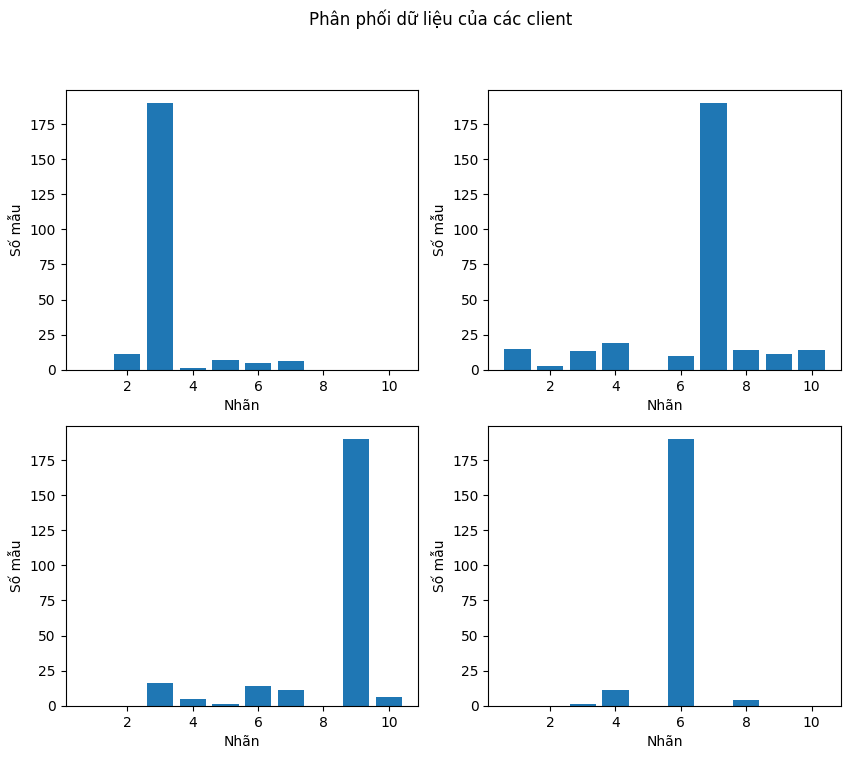

In [20]:
import matplotlib.pyplot as plt

data = {
    'client 2': [6, 6, 11, 0, 330, 0, 7, 0, 1, 0],
    'client 56': [0, 330, 7, 0, 1, 6, 4, 6, 0, 7],
    'client 58': [0, 2, 4, 0, 330, 0, 3, 8, 0, 1],
    'client 75': [10, 4, 3, 330, 0, 0, 0, 11, 0, 0],
}

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Phân phối dữ liệu của các client')

clients = list(data.keys())

for i in range(2):
    for j in range(2):
        client_name = clients[i * 2 + j]
        y_values = data[client_name]
        axs[i, j].bar(range(1, 11), y_values)
        #axs[i, j].set_title(client_name)
        axs[i, j].set_xlabel('Nhãn')
        axs[i, j].set_ylabel('Số mẫu')
plt.savefig('../FL/'+'5.pdf', format = 'pdf',bbox_inches='tight')

In [6]:
import os

def them_dong_vao_nhieu_file(thu_muc, line_num, noi_dung):
    for ten_file in os.listdir(thu_muc):
        if ten_file.endswith('.txt'):
            duong_dan_tep = os.path.join(thu_muc, ten_file)
            with open(duong_dan_tep, 'r') as file:
                lines = file.readlines()
            lines.insert(line_num - 1, noi_dung + '\n')
            with open(duong_dan_tep, 'w') as file:
                file.writelines(lines)

them_dong_vao_nhieu_file('C:/HUST/20231/Lab/FL/save_flame_out_rlr', 10, '    Style send: trust')


In [ ]:
import os

def sua_dong_trong_nhieu_file(thu_muc, line_num, noi_dung):
    for ten_file in os.listdir(thu_muc):
        if ten_file.endswith('.txt'):
            duong_dan_tep = os.path.join(thu_muc, ten_file)
            with open(duong_dan_tep, 'r') as file:
                lines = file.readlines()
            lines[line_num - 1] = noi_dung + '\n'
            with open(duong_dan_tep, 'w') as file:
                file.writelines(lines)

sua_dong_trong_nhieu_file('./save_out_mistrust/', 10, '    Style send: mistrust')